<a href="https://colab.research.google.com/github/yumnaizzati03/Case-Study-2-Data-Mining-Kelompok-7-/blob/main/Kasus_Klasifikasi_Kelompok_Hoax_(7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study Data Mining dan Business Intelligence: Aplikasi Model Klasifikasi**
Disusun Oleh Kelompok Hoax (7):

1. Divaya Syifa Susilobudi (2106650790)
2. Rima Fitrianti Azahra (2106701974)
3. Sabrina Zahra Salsabila (2106726895)
4. Sanchia Natisha Kenzie (2106724990)
5. Yumna Izzati (2106633191)

## Domain Knowledge & Data Understanding:

- Data dibawah ini adalah data Hoax dari https://www.mafindo.or.id/ yang didapatkan secara **legal** dengan meminta izin kepada pimpinan perusahaan Mafindo.
- Label "0" menyatakan **bukan Hoax** dan "1" menyatakan post **Hoax**.

## Tugas Anda:
- Lakukan PreProcessing pada variabel "teks" di data.
- Lalukan EDA pada data Hoax tersebut.
- Buat **Model klasifikasi Hoax** terbaik dengan **parameter optimal** (dan **cross validated**)
- Buatlah sebuah **laporan Analisa Data** tersebut (di Jupyter Notebook) seolah-olah anda adalah seorang Data Scientist Kominfo dan ditugaskan oleh menteri-nya untuk menjelaskan tentang data Hoax yang ada.
- Jangan lupa jika anda akan melakukan attach gambar (misal screenshot dari *Voyant Tools*) maka **jangan load local file**, tapi upload terlebih dahulu ke GitHub (kalian sendiri) lalu load di Jupyter Notebook.
- Cara load image dengan markdown saat gambar ada di GitHub: https://stackoverflow.com/a/63270255/2844866
- Ingat jangan load local image(s) karena dosen tidak akan bisa membukanya.
- Teknik preprocessing, slicing data, variabel selection & engineering, pemilihan visualisasi, interpretasi, Performa model klasifikasi, dan penyajian report adalah hal-hal yang akan dinilai dari kasus ini.
- Code harus bisa di "Run-All" di **Google Colab**, "Error Free", dan **TIDAK PERLU REQUEST ACCESS** (bisa dibuka oleh umum/public).

# **BAB 1**
# **PENDAHULUAN**
---
##### Masalah yang akan dibahas pada projek kelompok kami pada kali ini adalah menganalisis data Hoax yang bersumber dari https://www.mafindo.or.id/ dan akan dimodelkan bentuk klasifikasinya untuk menentukan data hoax dan bukan hoax.
*   Jumlah pengukuran variabel awal sebanyak 4700 Data
*   Tipe data yang dipakai pada proyek kali ini diantaranya :
1. ID (ID Data)            = int64
2. label (1 untuk Hoax, 0 untuk Tidak Hoax)      =           int64
3. tanggal (tanggal narasi ditemukan) =             object
4. judul (judul/tagline berita yang tersebar)    =          object
5. narasi (isi berita)       =        object
6. nama file gambar (file gambar)  =   object


### ***Import Packages dan Data yang akan digunakan***


Akan di-*import* packages dan data yang kami butuhkan

In [ ]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import nltk

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData)
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
    data = pd.read_csv(fData)

data.head()

--2023-11-24 12:55:28--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279335 (1.2M) [text/plain]
Saving to: ‘data/Data-Hoax-Mafindo.csv’

Data-Hoax-Mafindo.c 100%[===================>]   1.22M  --.-KB/s    in 0.07s   

2023-11-24 12:55:28 (17.6 MB/s) - ‘data/Data-Hoax-Mafindo.csv’ saved [1279335/1279335]



,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
data.dtypes

ID                   int64
label                int64
tanggal             object
judul               object
narasi              object
nama file gambar    object
dtype: object

## **BAB 2**
## **PREPROCESSING**
---

### ***Import Module dan Library yang akan digunakan***

> Indented block


---

In [ ]:
!pip install sastrawi unidecode textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 22.6 MB/s eta 0:00:00


In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk, pickle
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from dtreeviz.trees import *
#import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

'Done'

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### **Data Preprocessing**



In [ ]:
# Akan dilihat jumlah text per-kategori(label)

data['label'].value_counts()

1    3850
0     851
Name: label, dtype: int64

In [ ]:
# Kita akan menggunakan fitur narasi saja dalam melakukan prediksi terhadap label
data_fix = data[['narasi', 'label']]
data.at[0,'narasi']

'A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔'

In [ ]:
# Cek Unique
data_fix['narasi'].unique().tolist()

['A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔',
 'Yth.Seluruh Anggota Grup Sesuai Instruksi Gubernur Jawa Tengah Hasil Rapat Tim Gugus Tugas Covid 19 Jateng sbb:',
 'Jokowi adalah presiden terbaik dlm sejarah bangsa Indonesia. Jim Rohn, motivator terbaik dunia',
 'Maaf Mas2 dan Mbak2, ini bukan politik, tapi kenyataan Pak Jokowi berhasil memulangkan 11,000 Triliun uang negara dari Swiss. 11ribu Triliun siap di bawa balik ke Indonesia.RUU Treaty on Mutual Legal Assistance in Criminal Matters between the Republic of Indonesia and The Swiss Confed

In [ ]:
# Mengekstrak StopWords
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
# Melakukan pembersihan data
def cleanText(txt):
    # Hashtag Preprocessing
    # Singkat/Slang
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

In [ ]:
if 'cleaned_text' not in data_fix.columns:
    data_fix['cleaned_text'] = '' # inititate kolom kosong
    for idx, post in tqdm(data_fix.iterrows()):
        data_fix.at[idx, 'cleaned_text'] = cleanText(post.narasi)
    with open(fData, 'wb') as f:
        pickle.dump(data_fix, f)
data_fix

4701it [27:32,  2.84it/s]


,narasi,label,cleaned_text
0,A caller to a radio talk show recently shared ...,1,caller radio talk show recently shared that hi...
1,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1,yth seluruh anggota grup sesuai instruksi gube...
2,Jokowi adalah presiden terbaik dlm sejarah ban...,1,jokowi presiden baik dlm sejarah bangsa indone...
3,"Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1,maaf mas2 mbak2 bukan politik nyata pak jokowi...
4,Kadrun kalo lihat foto ini panas dingin . .,1,kadrun kalo lihat foto panas dingin
...,...,...,...
4696,Ratusan massa dari Barisan Serba Guna (Banser)...,0,ratus massa baris serba banser kader kabupaten...
4697,ERDOGAN DATANG KE VATIKAN MENJUMPAI BABA (POP)...,1,erdogan datang vatikan jumpa baba pop vatikan ...
4698,IMIGRAN CN SENGAJA MEMBAWA VIRUS DAN MEREKA TE...,1,imigran sengaja bawa virus sunti anti bodi bel...
4699,Beredar dimana mana jadi VIRAL video ini\nApa ...,1,edar mana jadi viral video apa tindak kpu bawa...


In [ ]:
data_fix['cleaned_text'].unique().tolist()

['caller radio talk show recently shared that his wife was hospitalized told she had covid only couple days left live doctor friend suggested she tested for legionnaires disease because she wore the same mask every day all day long turns out was legionnaires disease from the moisture bacteria her mask she was given antibiotics within two days was better what these spikes covid are really something else due mask induced infections',
 'yth seluruh anggota grup sesuai instruksi gubernur jawa tengah hasil rapat tim gugus tugas covid jateng sbb',
 'jokowi presiden baik dlm sejarah bangsa indonesia jim rohn motivator baik dunia',
 'maaf mas2 mbak2 bukan politik nyata pak jokowi hasil pulang 000 triliun uang negara swiss 11ribu triliun siap bawa balik indonesia ruu treaty mutual legal assistance criminal matters between the republic indonesia and the swiss confederation mla swiss resmi sah dpr tanggal juli 2020 proses konstitusi tarik dana swiss selesai juang panjang hadap koruptor bersenggam

In [ ]:
data_fix[['cleaned_text']].to_csv("cleaned_text.txt", index=False, encoding='utf8', header=False)

## **Data Spliting**

Akan dipecah dataset menjadi 2 bagian untuk training dan testing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
tf_vector = get_feature_vector(np.array(data_fix["cleaned_text"]).ravel())
X_narasi = tf_vector.transform(np.array(data_fix["cleaned_text"]).ravel())
y = np.array(data_fix["label"]).ravel()

In [ ]:
x_train_narasi, x_test_narasi, y_train_narasi, y_test_narasi = train_test_split(X_narasi, y, test_size=0.2, random_state=42)
print(x_train_narasi.shape, x_test_narasi.shape)

(3760, 14452) (941, 14452)


(3760, 14452): Ini menunjukkan bahwa dataset untuk pelatihan terdiri dari 3760 sampel (baris) dan 14452 fitur (kolom). Setiap fitur mungkin merupakan kata atau istilah yang muncul dalam data teks yang telah diolah menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency).

(941, 14452): Ini menunjukkan bahwa dataset untuk pengujian terdiri dari 941 sampel dan juga memiliki 14452 fitur. Fitur-fitur ini sama dengan yang digunakan dalam pelatihan, karena transformasi TF-IDF dihitung berdasarkan fitur-fitur yang muncul dalam data pelatihan.

Pembagian dataset ini dilakukan dengan menggunakan fungsi train_test_split dari scikit-learn, dimana parameter test_size disetel sebesar 0.2, yang berarti 20% dari data akan digunakan sebagai dataset pengujian, sedangkan 80% yang lainnya akan digunakan sebagai dataset pelatihan. Pembagian dilakukan secara acak dengan menggunakan random_state=42 untuk memastikan reproducibility, yaitu memastikan bahwa jika Anda menjalankan kode ini kembali, Anda akan mendapatkan pembagian yang sama jika nilai random_state tetap.

## **BAB 3**

## **MODELING**

## **Data Fitting**

### **KNN**

In [ ]:
n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(x_train_narasi, y_train_narasi)
print('Done!')

NameError: ignored

In [ ]:
# Prediksi dengan k-NN
y_kNN1 = kNN.predict(x_test_narasi)
y_kNN1[-10:]

NameError: ignored

In [ ]:
print("Kasus 01 - kNN")
print(confusion_matrix(y_test_narasi, y_kNN1))
print(classification_report(y_test_narasi, y_kNN1))

In [ ]:
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
mulai = time.time()
scores_kNN = cross_val_score(kNN, X_narasi, y, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

### **Regresi Logistik**

In [ ]:
reglog = LogisticRegression().fit(x_train_narasi, y_train_narasi)
y_reglog1 = reglog.predict(x_test_narasi)
print("Kasus 02 - Regresi Logistik")
print(confusion_matrix(y_test_narasi, y_reglog1))
print(classification_report(y_test_narasi, y_reglog1))

In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, X_narasi, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

### **Naive Bayes**

In [ ]:
gnb = GaussianNB()
nbc = gnb.fit(x_train_narasi.toarray(), y_train_narasi)
y_nb1 = nbc.predict(x_test_narasi.toarray())

print(confusion_matrix(y_test_narasi, y_nb1))
print(classification_report(y_test_narasi, y_nb1))

### **Decision Tree**

In [ ]:
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(x_train_narasi, y_train_narasi)
y_DT1 = DT.predict(x_test_narasi)

print(confusion_matrix(y_test_narasi, y_DT1))
print(classification_report(y_test_narasi, y_DT1))

### **Random Forest**

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_narasi, y_train_narasi)
y_rf1 = rf.predict(x_test_narasi)

print(confusion_matrix(y_test_narasi, y_rf1))
print(classification_report(y_test_narasi, y_rf1))

### **SVM**

In [ ]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')#Misal menggunakan kernel Linear

dSVM.fit(x_train_narasi, y_train_narasi)
y_SVM1 = dSVM.predict(x_train_narasi)

print(confusion_matrix(y_train_narasi, y_SVM1))
print(classification_report(y_train_narasi, y_SVM1))

In [ ]:
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
mulai = time.time()
scores_svm = cross_val_score(dSVM, X_narasi, y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_svm.mean(), scores_svm.std() * 2, waktu))

## **Pemilihan Best Model**

kNN         0.772340
RegLog      0.819149
NaiveBys    0.687234
DecTree     0.708511
RdForest    0.821277
SVM         0.740426
dtype: float64

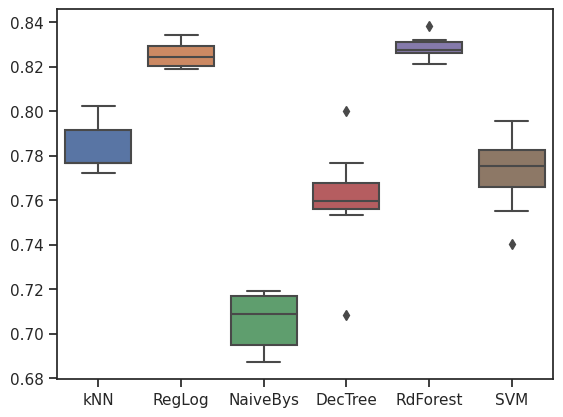

In [ ]:
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt, "RdForest":scores_rf, "SVM":scores_svm})
p = sns.boxplot(data = df_)
df_.min()


**kNN (k-Nearest Neighbors)**: Model kNN memiliki tingkat akurasi sekitar 77.23%.

**RegLog (Logistic Regression)**: Model Regresi Logistik memiliki tingkat akurasi sekitar 81.92%.

**NaiveBys (Naive Bayes)**: Model Naive Bayes memiliki tingkat akurasi sekitar 68.72%.

**DecTree (Decision Tree)**: Model Decision Tree memiliki tingkat akurasi sekitar 70.85%.

**RdForest (Random Forest)**: Model Random Forest memiliki tingkat akurasi sekitar 82.13%.

**SVM (Support Vector Machine)**: Model SVM memiliki tingkat akurasi sekitar 74.04%.

Tingkat akurasi mencerminkan sejauh mana model dapat memprediksi dengan benar pada dataset yang digunakan. Semakin tinggi tingkat akurasi, semakin baik performa model tersebut dalam melakukan prediksi pada data yang belum pernah dilihat sebelumnya. Namun, perlu diingat bahwa akurasi bukanlah satu-satunya metrik evaluasi, terutama jika dataset tidak seimbang atau memiliki kasus positif/negatif yang tidak seimbang. Metrik lain seperti presisi, recall, dan F1-score juga dapat memberikan gambaran yang lebih lengkap tentang performa model.

## **BAB 4**

## **VISUALIZATION AND INSIGHTS**

*   Akan digunakan Voyant Tools pada data Hoax yang bersumber dari https://www.mafindo.or.id/ untuk melihat seberapa banyak suatu kata muncul dalam data yang berlabel hoaks.

![image.png](https://raw.githubusercontent.com/yumnaizzati03/Case-Study-2-Data-Mining-Kelompok-7-/main/Visualisasi.png)

Didapat hasil kata-kata yang paling banyak muncul dalam data hoaks sebagai berikut:
-	Jadi (714 kata)
-	Orang (659 kata)
-	Indonesia (618 kata)
-	Sebut (413 kata)
-	Anak (357 kata)

Dari hasil ini, dapat dipahami bahwa konten-konten hoaks yang beredar paling sering menggunakan kata-kata di atas. Sehingga disimpulkan, masyarakat harus bisa lebih bijak dan berhati-hati dalam memahami informasi dari isu/topik yang mengandung kata-kata tersebut.

*   Akan digunakan Wordlink untuk melihat kata apa yang paling tinggi korelasinya, dilihat dari seberapa sering kata-kata tersebut digunakan dalam satu kalimat yang sama.

![image.png](https://raw.githubusercontent.com/yumnaizzati03/Case-Study-2-Data-Mining-Kelompok-7-/main/wordlink%202.png)

Dari Wordlink di atas, didapat hasil bahwa kata "Jokowi" paling banyak berhubungan dalam satu kalimat dengan kata "Presiden", "Prabowo", "Indonesia", dan "Jadi".

![image.png](https://raw.githubusercontent.com/yumnaizzati03/Case-Study-2-Data-Mining-Kelompok-7-/main/wordlink%201.png)

Dari Wordlink di atas, didapat hasil bahwa kata "Virus" paling banyak berhubungan dalam satu kalimat dengan kata "Corona", "Mati", "Orang", dan "Covid".

**Insight**

Dilihat dari visualisasi di atas, disimpulkan konten hoaks yang kami analisis meliputi dua topik, yaitu:


1.   Jokowi yang sering dikaitkan dengan Prabowo dan Presiden. Menurut kami, Kominfo perlu mengontrol artikel/berita seputar Bapak Jokowi yang posisinya sebagai Presiden Indonesia memiliki kemungkinan akan digantikan oleh Bapak Prabowo, karena banyak di antaranya hanya merupakan hoaks, di mana hal ini dapat memengaruhi penilaian masyarakat terhadap pemilihan umum yang akan datang.  
2.   Virus yang sering dikaitkan dengan dengan Orang dan Mati. Menurut kami, Kominfo harus bekerja sama dengan Kemenkes untuk memberikan klarifikasi terkait berita-berita mengenai kematian akibat Virus Covid/Corona. Harus dipastikan sejumlah kematian yang terjadi benar atau tidak disebabkan oleh Virus tersebut. Hal ini bertujuan agar tidak menimbulkan kepanikan bagi masyarakat.

